In [1]:
import numpy as np
import pandas as pd
import acquire as a 
import prepare as p
import wrangle_zillow as wz
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer

In [2]:
#acquire data
train, validate, test =wz.wrangle_zillow()

df --> (47968, 17)
train -> (26861, 17)
validate -> (11513, 17)
test -> (9594, 17)


# Exercises


**1.Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?**

In [4]:
a.miss_dup_values(train)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [3]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,heatingorsystemtypeid,propertylandusetypeid,propertylandusedesc,unitcnt,taxvaluedollarcnt,taxamount,logerror,transactiondate
33805,13998373,2.0,3.0,1213.0,6059.0,33787029.0,-118021448.0,6300.0,1959.0,2.0,261.0,Single Family Residential,1.0,265294.0,5187.02,-0.019196,2017-05-08
71483,14367308,2.5,4.0,1796.0,6059.0,33684762.0,-117672114.0,3750.0,1995.0,2.0,261.0,Single Family Residential,1.0,276435.0,3535.70,-0.007649,2017-08-29
13285,10860228,2.0,3.0,1527.0,6037.0,34159441.0,-118433721.0,5899.0,1948.0,7.0,261.0,Single Family Residential,1.0,837507.0,10126.12,-0.023743,2017-02-28
49527,11034960,2.0,3.0,1418.0,6037.0,34239930.0,-118437196.0,6238.0,1952.0,7.0,261.0,Single Family Residential,1.0,355336.0,4441.11,0.258737,2017-06-22
7578,12937593,1.0,3.0,1442.0,6037.0,34072720.0,-117919131.0,9885.0,1952.0,2.0,261.0,Single Family Residential,1.0,308440.0,3952.11,0.029482,2017-02-02


- I will add a new column with the name of counties 
-unitcnt can be removed


In [5]:
counties= {
    6037: "Los Angeles",
    6059: "Orange",
    6111: "Ventura"
    }

In [6]:
train['county_name'] = train.fips.map(counties)

In [7]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,heatingorsystemtypeid,propertylandusetypeid,propertylandusedesc,unitcnt,taxvaluedollarcnt,taxamount,logerror,transactiondate,county_name
33805,13998373,2.0,3.0,1213.0,6059.0,33787029.0,-118021448.0,6300.0,1959.0,2.0,261.0,Single Family Residential,1.0,265294.0,5187.02,-0.019196,2017-05-08,Orange
71483,14367308,2.5,4.0,1796.0,6059.0,33684762.0,-117672114.0,3750.0,1995.0,2.0,261.0,Single Family Residential,1.0,276435.0,3535.70,-0.007649,2017-08-29,Orange
13285,10860228,2.0,3.0,1527.0,6037.0,34159441.0,-118433721.0,5899.0,1948.0,7.0,261.0,Single Family Residential,1.0,837507.0,10126.12,-0.023743,2017-02-28,Los Angeles
49527,11034960,2.0,3.0,1418.0,6037.0,34239930.0,-118437196.0,6238.0,1952.0,7.0,261.0,Single Family Residential,1.0,355336.0,4441.11,0.258737,2017-06-22,Los Angeles
7578,12937593,1.0,3.0,1442.0,6037.0,34072720.0,-117919131.0,9885.0,1952.0,2.0,261.0,Single Family Residential,1.0,308440.0,3952.11,0.029482,2017-02-02,Los Angeles


### Questions


**- 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?**

In [16]:
train[['county_name', 'logerror']].groupby(['county_name']).mean()

,logerror
county_name,
Los Angeles,0.012751
Orange,0.023246
Ventura,0.016612


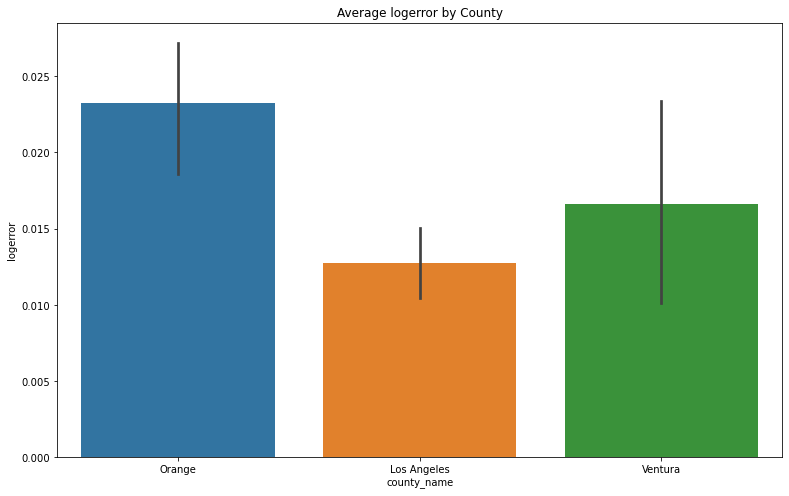

In [27]:
plt.figure(figsize=(13,8))
sns.barplot(data=train, y='logerror', x='county_name', palette = 'tab10')
plt.title('Average logerror by County')
plt.show()

In [ ]:
**takeaways**

- los angeles has the less average logerror 

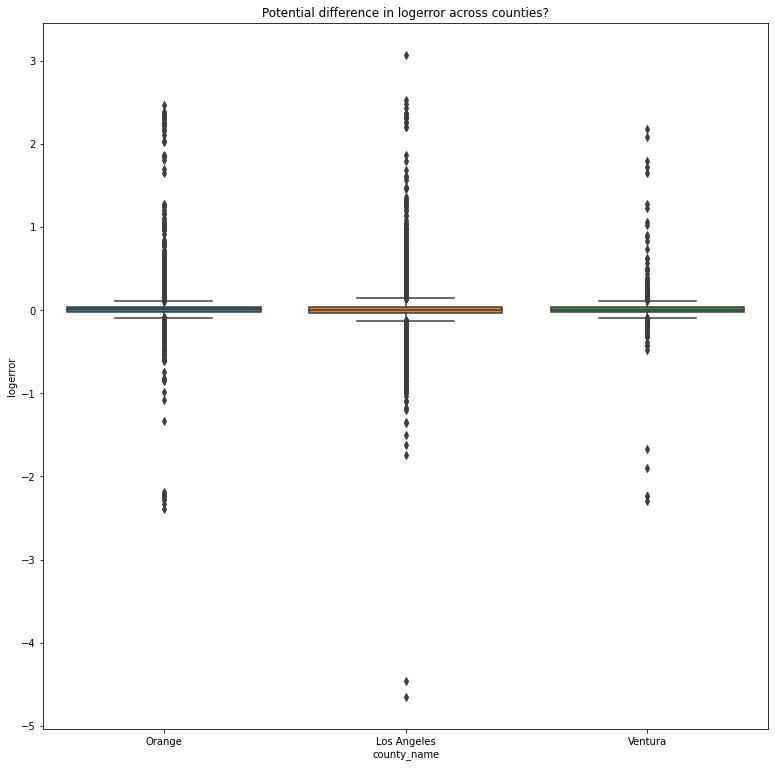

In [24]:
plt.figure(figsize=(13,13))
sns.boxplot(train.county_name, train.logerror)
plt.title('Potential difference in logerror across counties?')
plt.show()

In [28]:
#boxplot does not show clear information

In [ ]:
questions
-bin built year


**2. Answer those questions through a mix of statistical tests and visualizations.**

### Bonus:

**Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.**